Please use input from the other file

In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np

(302, 377)
(73, 254)
(564, 292)
(293, 189)


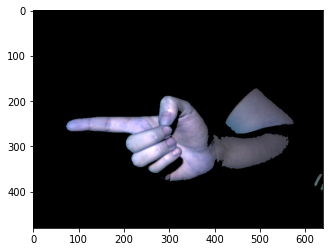

In [2]:
import numpy as np
from rdp import rdp
from PIL import Image
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import imutils
from math import radians, cos, sin, asin, sqrt
import math

def main():

    img = cv.imread('d hand.png')
    z = 'd hand.txt'  # Z and RGB
    z = np.loadtxt(z)
    #noise reduction
    hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lower = np.array([0, 5, 5], dtype="uint8")
    upper = np.array([200, 200, 200], dtype="uint8")
    skinRegionHSV = cv.inRange(hsvim, lower, upper)
    blurred = cv.blur(skinRegionHSV, (2, 2))
    ret, thresh = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY)
    cv.imwrite("thresh.jpg", thresh)
    
    #contours
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv.contourArea(x))
    #cv.drawContours(img, [contours], -1, (255, 255, 0), 2)
    cv.imwrite("contours.jpg", img)
    
    hull = cv.convexHull(contours)
    #cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
    cv.imwrite("hull.jpg", img)

    hull = cv.convexHull(contours, returnPoints=False)
    defects = cv.convexityDefects(contours, hull)
    
    #Get Extreme Points
    cnts = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    
    #Get center point
    M = cv.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    
    #Top
    x = 640
    while(x > 0):
        y = 0
        while(y < extTop[1] - 10):
            #print(x)
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            y = y + 1
        x = x - 1
    
    #Bottom
    x = 0
    while(x < 640):
        y = 480
        while(y > extBot[1] + 10):
            #print(x)
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            y = y - 1
        x = x + 1
    #Left
    y = 0
    while(y < 480):
        x = 0
        while(x < extLeft[0] - 10):
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            x = x + 1
        y = y + 1
    
    #Right
    y = 0
    while(y < 480):
        x = 640
        while(x > extRight[0] + 10):
            #cv.circle(img, (x, y), 5, (0, 255, 0), -1)
            x = x - 1
        y = y + 1
    
    # draw the center of the shape on the image
    #cv.circle(img, (cX, cY), 7, (0, 0, 255), -1)
    imgplot = plt.imshow(img)
    print(extBot)
    print(extLeft)
    print(extRight)
    print(extTop)
    
    
    return img, extBot[1], extTop[1], extLeft[0], extRight[0], z
    
if __name__ ==  '__main__':
    img, y2, y1, x2, x1,z = main()

In [3]:
image = img[(y1-(int(y1/2))):(y2+(int(y2/3))), (x2-(int(x2/2))):(x1+(int(x1/3)))]
print(image.shape)
image_height, image_width, _ = image.shape

(385, 603, 3)


In [4]:
z = 'd hand.txt' 
z = (-1)*np.loadtxt(z)

for i in range(image_height):
    for j in range(image_width):
        if (image[i][j][0] == 0 and image[i][j][1] == 0 and image[i][j][2] == 0): 
            image[i][j][0] = 128
            image[i][j][1] = 128
            image[i][j][2] = 128
cv2.imshow("Image",image)


'\nfor i in range(image_height):\n    for j in range(image_width):\n        if (image[i][j][0] == 0 and image[i][j][1] == 0 and image[i][j][2] == 0): \n            image[i][j][0] = 128\n            image[i][j][1] = 128\n            image[i][j][2] = 128\ncv2.imshow("Image",image)\ncv2.waitKey(0)\n'

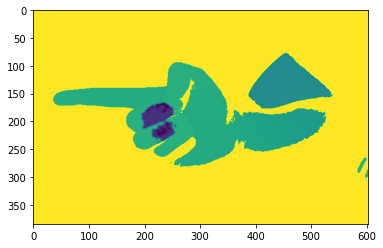

In [5]:
z = z[(y1-(int(y1/2))):(y2+(int(y2/3))), (x2-(int(x2/2))):(x1+(int(x1/3)))]
plt.imshow(z)

In [6]:
mp_hands = mp.solutions.hands

In [7]:
mp_drawing = mp.solutions.drawing_utils

In [8]:
image = cv2.flip(image,1)
image_height, image_width, _ = image.shape

In [9]:
hands = mp_hands.Hands(max_num_hands=2,
                      min_detection_confidence=0.01)

In [10]:
results = hands.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [11]:
print('Handedness: ', results.multi_handedness)

Handedness:  [classification {
  index: 1
  score: 1.0
  label: "Right"
}
]


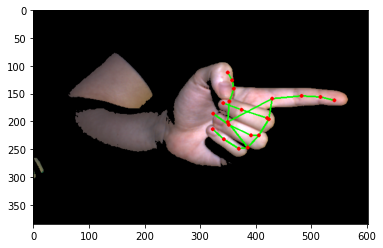

In [12]:
annoted_image = image.copy()
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annoted_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))


In [67]:
# x coordinates
p0x = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
p1x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
p2x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
p3x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
p4x = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
p5x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
p6x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
p7x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
p8x = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
p9x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
p10x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
p11x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
p12x = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
p13x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
p14x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
p15x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
p16x = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
p17x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
p18x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
p19x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
p20x = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width

In [68]:
print(p6x)

410.39402908086777


In [69]:
# y coordinates
p0y = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
p1y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
p2y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
p3y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
p4y = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
p5y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
p6y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
p7y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
p8y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
p9y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
p10y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
p11y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
p12y = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
p13y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
p14y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
p15y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
p16y = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
p17y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
p18y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
p19y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
p20y = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height


In [70]:
print(p6y)

149.51493740081787


In [71]:
# z coordinates
p0z = z[int(p0y)][int(p0x)]
p1z = z[int(p1y)][int(p1x)]
p2z = z[int(p2y)][int(p2x)]
p3z = z[int(p3y)][int(p3x)]
p4z = z[int(p4y)][int(p4x)]
p5z = z[int(p5y)][int(p5x)]
p6z = z[int(p6y)][int(p6x)]
p7z = z[int(p7y)][int(p7x)]
p8z = z[int(p8y)][int(p8x)]
p9z = z[int(p9y)][int(p9x)]
p10z = z[int(p10y)][int(p10x)]
p11z = z[int(p11y)][int(p11x)]
p12z = z[int(p12y)][int(p12x)]
p13z = z[int(p13y)][int(p13x)]
p14z = z[int(p14y)][int(p14x)]
p15z = z[int(p15y)][int(p15x)]
p16z = z[int(p16y)][int(p16x)]
p17z = z[int(p17y)][int(p17x)]
p18z = z[int(p18y)][int(p18x)]
p19z = z[int(p19y)][int(p19x)]
p20z = z[int(p20y)][int(p20x)]

In [72]:
print(p4z, p13z)

0.0 -773.6


In [73]:
# Basic Open - Curve 4
#Curve Four Finger One RS 


def curveFourFingerone():
    if((p6x > p5x) and (p6x > p7x)):
        return True
    else:
        return False
#Curve Four Finger Two RS 

def curveFourFingertwo():
    if((p10x > p9x) and (p10x > p11x)):
        return True
    else:
        return False

def curveFourFingerthree():
    if((p14x > p13x) and (p14x > p15x)):
        return True
    else:
        return False



def curveFourFingerfour():
    if((p18x > p17x) and (p18x > p19x)):
        return True
    else:
        return False

def curveSevenFingerfour():
    if((p18x < p19x) and (p19x < p20x)):
        return True
    else:
        return False
def curveSevenFingertwo():
    if((p10x < p11x) and (p11x < p12x)):
        return True
    else:
        return False
    
def curveSevenFingerthree():
    if((p14x < p15x) and (p15x < p16x)):
        return True
    else:
        return False
def curveSevenFingerone():
    if((p6x < p7x) and (p7x < p8x)):
        return True
    else:
        return False

def thumbfingertips():
    if((p4y < p12y) and (p12y < p16y) and (p16y < p20y) and (p4x < p8x) and (p4y < p5y)):
        return True
    else:
        return False
def thumbinbetween1and2():
    if ((p4y > p5y) and (p4y > p6y) and (p4y > p7y) and (p4y > p8y)):
        return True
    else:
        return False
def thumbonfinger3():
    if((p4z > p13z) and (p4y > p5y)):
        return True
    else:
        return False

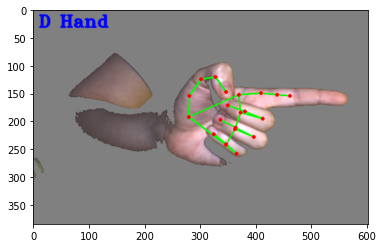

In [74]:
a = curveSevenFingerone();
b = curveFourFingertwo();
c = curveFourFingerthree();
d = curveFourFingerfour();
e = thumbfingertips();
if((a is True) and (b is True)  and (c is True) and (d is True) and (e is True)):
    cnt = "D Hand"
    cv2.putText(annoted_image, str(cnt), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))
else:
    print("Not D Hand")

In [39]:

a = curveFourFingerone();
b = curveFourFingertwo();
c = curveFourFingerthree();
d = curveFourFingerfour();
e = thumbfingertips();
if((a is True) and (b is True)  and (c is True) and (d is True) and (e is True)):
    cnt = "E Hand"
cv2.putText(annoted_image, str(cnt), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))


Not D Hand


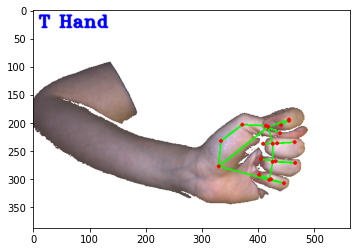

In [20]:
'''
a = curveSevenFingerone();
b = curveFourFingertwo();
c = curveFourFingerthree();
d = curveFourFingerfour();
e = thumbinbetween1and2();
if((a is True) and (b is True)  and (c is True) and (d is True) and (e is True)):
    cnt = "T Hand"
cv2.putText(annoted_image, str("T Hand"), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))
'''

In [53]:
'''
a = curveFourFingerone();
b = curveSevenFingertwo();
c = curveSevenFingerthree();
d = curveSevenFingerfour();
e = thumbfingertips();
print(a,b,c,d,e)
if((a is True) and (b is True)  and (c is True) and (d is True) and (e is True)):
    cnt = "F Hand"
cv2.putText(annoted_image, str(cnt), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))
'''

False False True True False


NameError: name 'cnt' is not defined

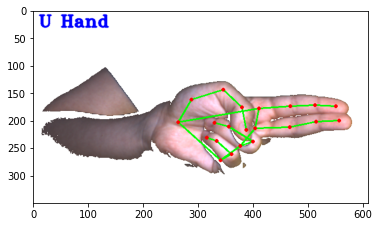

In [27]:
'''
a = curveSevenFingerone();
b = curveSevenFingertwo();
c = curveFourFingerthree();
d = curveFourFingerfour();
e = thumbonfinger3();
if((a is True) and (b is True)  and (c is True) and (d is True) and (e is True)):
    cnt = "U Hand"
    cv2.putText(annoted_image, str(cnt), (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    imageshow = plt.imshow(cv2.cvtColor(annoted_image,cv2.COLOR_BGR2RGB))
else:
    print("Not U Hand")
'''